Importar librerias necesarias

In [8]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importar y almacenar la data en variables

In [9]:
#GreenTrip Data
raw_data = pq.read_table('data\green_tripdata_2015-09.parquet')
data = raw_data.to_pandas()

#NYC ZONES
ny_zones = pd.read_csv('data\lk_nyc_zones.csv')


Desplegar info general para familiarizarse con el dataset

In [10]:
data.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2015-09-01 00:08:23,2015-09-01 00:12:46,N,1,74,42,1,1.40,6.0,0.5,0.5,0.0,0.5,None,0.3,7.8,2,1.0,None
1,2,2015-09-01 00:21:29,2015-09-01 00:25:33,N,1,256,37,1,0.74,5.0,0.5,0.5,0.0,0.0,None,0.3,6.3,2,1.0,None
2,2,2015-09-01 00:31:07,2015-09-01 00:41:08,N,1,80,36,1,2.52,10.0,0.5,0.5,0.0,0.0,None,0.3,11.3,2,1.0,None
3,2,2015-09-01 00:57:46,2015-09-01 01:05:49,N,4,191,265,1,2.80,16.0,0.5,0.5,0.0,0.0,None,0.3,17.3,2,1.0,None
4,1,2015-09-01 00:08:04,2015-09-01 00:17:30,N,1,62,71,1,2.20,9.5,0.5,0.5,0.0,0.0,None,0.3,10.8,2,1.0,None


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494927 entries, 0 to 1494926
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1494927 non-null  int64         
 1   lpep_pickup_datetime   1494927 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  1494927 non-null  datetime64[ns]
 3   store_and_fwd_flag     1494927 non-null  object        
 4   RatecodeID             1494927 non-null  int64         
 5   PULocationID           1494927 non-null  int64         
 6   DOLocationID           1494927 non-null  int64         
 7   passenger_count        1494927 non-null  int64         
 8   trip_distance          1494927 non-null  float64       
 9   fare_amount            1494927 non-null  float64       
 10  extra                  1494927 non-null  float64       
 11  mta_tax                1494927 non-null  float64       
 12  tip_amount             14949

##### Q1) Informa cuántas filas y columnas tiene el archivo

In [12]:
print(f'Número de filas y columnas:{data.shape}')

Número de filas y columnas:(1494927, 20)


##### Q2) 
● Grafica un histograma de la distancia del viaje ("Trip Distance").

● Informa cualquier estructura que encuentres y cualquier hipótesis que tengas sobre esa
estructura.


Un histograma es una representación gráfica que muestra la distribución de frecuencias de un conjunto de datos. En otras palabras, es una forma de visualizar la cantidad de veces que ocurren diferentes valores en un conjunto de datos numéricos.

En un histograma, el eje horizontal representa los posibles valores que pueden tomar los datos, y el eje vertical muestra la frecuencia con la que esos valores aparecen en el conjunto de datos. Los valores se agrupan en intervalos o "bins" en el eje horizontal, y la altura de cada barra en el histograma corresponde a la frecuencia de datos que caen dentro de ese intervalo.

Los histogramas son especialmente útiles para comprender la distribución de los datos, identificar patrones, tendencias y posibles valores atípicos

In [13]:
data['trip_distance'].describe()

count    1.494927e+06
mean     2.968138e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: trip_distance, dtype: float64

**Media (Promedio)**: La media de distancia de viaje es aproximadamente 2.97 millas. Esto te da una idea general del valor típico esperado para una distancia de viaje, pero también sugiere que podría haber una cantidad significativa de viajes cortos que arrastran la media hacia abajo.

**Mediana**: La mediana, que es 1.98 millas, es menor que la media, lo que sugiere una distribución sesgada hacia la derecha. Esto puede ser causado por la presencia de valores atípicos extremadamente grandes (como se mencionó, la distancia máxima es 603.1 millas), que afectan a la media pero no tienen tanto impacto en la mediana.

**Outliers**: La diferencia notable entre la media y la mediana junto con el valor máximo de 603.1 millas indica la presencia de outliers extremadamente grandes. Esto podría ser el resultado de errores en la recopilación de datos o casos excepcionales, como viajes inusualmente largos.

En general, estos valores sugieren que hay una amplia variabilidad en las distancias de viaje registradas, con una concentración de viajes más cortos y la presencia de algunos viajes excepcionalmente largos que afectan las medidas estadísticas. La presencia de outliers fuertes puede influir en la interpretación de la distribución y afectar la visualización. 

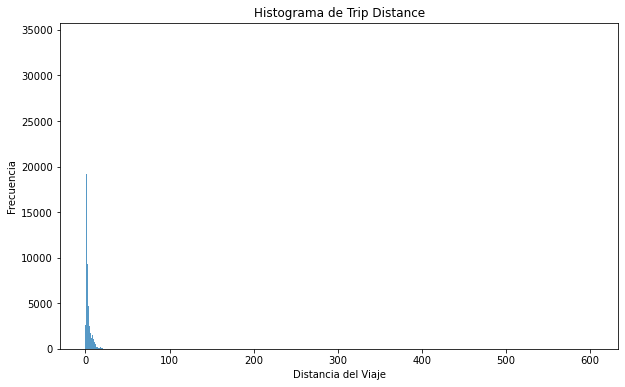

In [14]:
# Graficar un histograma de la columna 'Trip Distance'
plt.figure(figsize=(10, 6))
sns.histplot(data = data , x = 'trip_distance')

plt.title('Histograma de Trip Distance')
plt.xlabel('Distancia del Viaje')
plt.ylabel('Frecuencia')
plt.show()

Un boxplot, también conocido como diagrama de caja y bigote, es una representación gráfica que muestra la distribución de un conjunto de datos numéricos y permite identificar valores atípicos (outliers) y características importantes de la distribución, como la mediana y los cuartiles.

c:\Users\agust\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

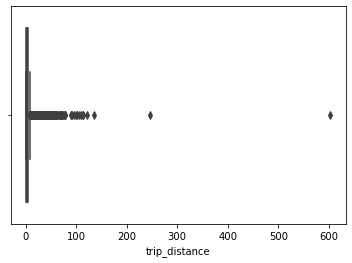

In [15]:
sns.boxplot(data['trip_distance'])

In [17]:
# Definir los umbrales para contar, incluyendo 0
thresholds = [0, 10, 20, 40, 70, 100, 200, 300]

# Utilizar list comprehension para contar cuántos valores superan cada umbral
counts = {threshold: (data['trip_distance'] > threshold).sum() for threshold in thresholds}

# Agregar conteo para valores iguales a 0
counts[0] = (data['trip_distance'] == 0).sum()

# Imprimir los resultados
for threshold, count in counts.items():
    print(f"Cantidad de valores en 'Trip Distance' que {'son 0' if threshold == 0 else 'superan ' + str(threshold)}: {count}")

Cantidad de valores en 'Trip Distance' que son 0: 20594
Cantidad de valores en 'Trip Distance' que superan 10: 53766
Cantidad de valores en 'Trip Distance' que superan 20: 3364
Cantidad de valores en 'Trip Distance' que superan 40: 171
Cantidad de valores en 'Trip Distance' que superan 70: 21
Cantidad de valores en 'Trip Distance' que superan 100: 10
Cantidad de valores en 'Trip Distance' que superan 200: 2
Cantidad de valores en 'Trip Distance' que superan 300: 1



La distancia mínima de viaje es 0.0 millas, lo que podría indicar viajes muy cortos o incluso viajes donde el taxímetro no registró distancia debido a paradas frecuentes. La distancia máxima es 603.1 millas, lo que implicaría viajes extremadamente largos (aprox la distancia entre BS AS - Corrientes ó CDMX - Monterrey). Esta amplia gama indica una variabilidad significativa en las distancias de viaje registradas, que se puede asumir como errores de medición o valores incorrectos ya que nuestros datos corresponden a los Green Taxis de NYC.

Si tenemos valores atípicos importantes en nuestro conjunto de datos (como es el caso) y esto está afectando la visualización de un histplot, podemos abordar el problema de distintas formas para mitigar el impacto de los outliers y mejorar la visualización. 



La **eliminación de outliers** parece ser una buena alternativa para la ocasion. 
- Nos permite una representación más precisa de la distribución real de los valores dentro del rango típico.
- La visualización resultante reflejará mejor la mayoría de los datos y podría ser más fácil de interpretar.
- Suele recomendarse cuando los outliers son claramente errores de medición o valores incorrectos.



Hay 20594 valores iguales a 0. Podemos eliminarlos ya que se pueden deber también a errores de medición o rendondeos.

Eliminaremos también aquellos valores que se alejen **4 desvíos estandar de la media**.

_En una distribución normal, alrededor del 99.9% de los datos se encuentran dentro de ±4 desviaciones estándar de la media. Esta es una propiedad conocida de las distribuciones normales, y se utiliza como base para decidir cuántas desviaciones estándar considerar al eliminar outliers_

In [29]:
# Eliminar valores iguales a 0
data_sin_outliers = data[data['trip_distance'] != 0]

# Calcular la media y la desviación estándar
mean_trip_distance = data_sin_outliers['trip_distance'].mean()
std_trip_distance = data_sin_outliers['trip_distance'].std()

# Definir el límite superior e inferior basado en 4 desviaciones estándar
upper_limit = mean_trip_distance + 4 * std_trip_distance
lower_limit = mean_trip_distance - 4 * std_trip_distance

# Filtrar los valores que están dentro de los límites
data_filtered = data_sin_outliers[(data_sin_outliers['trip_distance'] >= lower_limit) & (data_sin_outliers['trip_distance'] <= upper_limit)].copy()

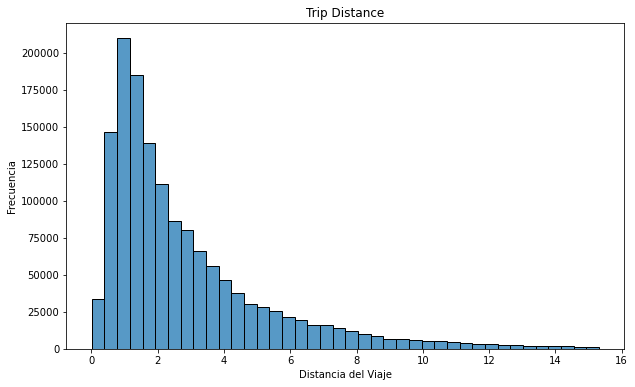

In [30]:
# Graficar un histograma de la columna 'Trip Distance' una vez filtrado los outliers
plt.figure(figsize=(10, 6))
sns.histplot(data = data_filtered , x = 'trip_distance', bins = 40)

plt.title('Trip Distance')
plt.xlabel('Distancia del Viaje')
plt.ylabel('Frecuencia')
plt.show()

Vemos una distrinución asimétrica en la distancia de viaje de los Green Taxis de NYC, sesgada hacia la derecha (a.k.a distribución asimetricia positiva) tal como se habia inferido a partir de los datos de la media y mediana.

Una distribución asimétrica positiva hacia la derecha en el set de datos de Green Taxis de NYC sugiere entonces una concentración de viajes más cortos con la presencia de algunos viajes excepcionalmente largos que afectan la forma de la distribución. Esto puede ser común en datos de viajes y transporte, donde la mayoría de las veces las distancias son cortas, pero ocasionalmente hay viajes largos o inusuales.

Ventajas y desventajas de eliminacion de outliers y transformación logaritmica

Eliminar Outliers:

Ventajas:

    Puede producir una representación más precisa de la distribución real de los valores dentro del rango típico.
    La visualización resultante (como un histplot) reflejará mejor la mayoría de los datos y podría ser más fácil de interpretar.
    Puede ser adecuado si los outliers son claramente errores de medición o valores incorrectos.

Desventajas:

    La eliminación de outliers puede llevar a la pérdida de información valiosa, especialmente si los valores atípicos son legítimos y relevantes.
    La interpretación de la distribución puede ser sesgada y no reflejará la realidad si los valores atípicos son parte natural de la variabilidad de los datos.
    Los resultados pueden variar según el criterio utilizado para definir qué se considera un outlier y qué no.

Transformación Logarítmica:

Ventajas:

    Ayuda a suavizar la distribución y reduce el impacto de los outliers extremos en la visualización.
    Conserva todos los datos y puede proporcionar información valiosa sobre cómo se distribuyen los valores incluso en presencia de outliers.
    Puede ayudar a cumplir con suposiciones de normalidad o linealidad en análisis posteriores.

Desventajas:

    La interpretación de la visualización se complica debido a la transformación logarítmica en el eje x.
    Puede no ser adecuada si tienes dificultades para interpretar y comunicar datos transformados.

Elección entre Eliminar Outliers y Transformación Logarítmica:

La elección entre eliminar outliers y aplicar una transformación logarítmica depende de tus objetivos y el contexto de tus datos. Si los outliers son errores evidentes o no representativos de la población que estás estudiando, la eliminación podría ser justificable. Sin embargo, si los outliers son legítimos y relevantes, la transformación logarítmica podría ser una mejor opción para preservar la integridad de los datos y proporcionar una vista más completa de la distribución.

En última instancia, es importante evaluar cuál enfoque se adapta mejor a tus objetivos analíticos y cómo deseas presentar e interpretar los resultados.

Otra alternativa podría haber sido la __*transformación logarítmica*__,  una técnica común para manejar datos con distribuciones asimétricas o con valores extremadamente dispersos. La idea detrás de esta transformación es que el logaritmo suaviza la escala de los datos, comprimiendo los valores más grandes y ampliando los valores más pequeños. Esto puede ayudar a reducir la influencia de los outliers extremos y facilitar la visualización de la distribución.

Cuando aplicas una transformación logarítmica a tus datos, los valores atípicos extremos tienden a "acercarse" al centro, lo que puede resultar en una distribución más aparentemente normal y menos sesgada hacia los valores altos.

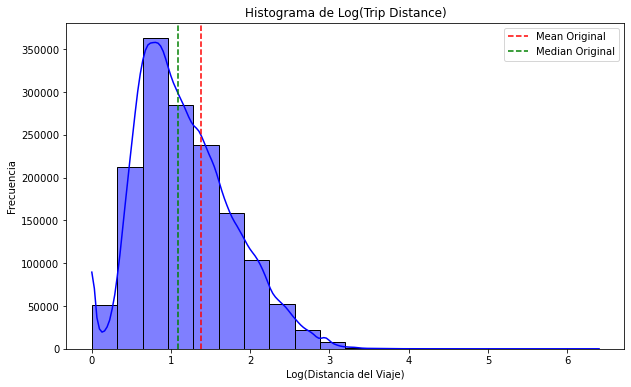

In [ ]:
# Calcula los valores estadísticos en la escala original antes de la transformación
mean_original = data['trip_distance'].mean()
median_original = data['trip_distance'].median()
# Aplica una transformación logarítmica a la columna 'Trip Distance'
data['Log_Trip_Distance'] = np.log1p(data['trip_distance'])

# Graficar un histplot de la columna transformada
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Trip_Distance'], bins=20, kde=True, color='blue')

# Agrega anotaciones para los valores estadísticos en la escala original
plt.axvline(np.log1p(mean_original), color='red', linestyle='dashed', label=f'Mean Original: {mean_original:.2f}')
plt.axvline(np.log1p(median_original), color='green', linestyle='dashed', label=f'Median Original: {median_original:.2f}')

plt.title('Histograma de Log(Trip Distance)')
plt.xlabel('Log(Distancia del Viaje)')
plt.ylabel('Frecuencia')
plt.legend()

# Agrega leyenda para las líneas punteadas
plt.legend(handles=[plt.Line2D([0], [0], color='red', linestyle='dashed', label='Mean Original'),
                    plt.Line2D([0], [0], color='green', linestyle='dashed', label='Median Original')])

plt.show()


##### Q3)
● Informa la distancia promedio y la mediana de los viajes agrupados por hora del día.

En primer lugar, si debemos agrupor por hora del día debemos extrar la hora de las columnas "lpep_pickup_datetime" y "lpep_dropoff_datetime"

In [148]:
# Convertir las columnas de fecha y hora a formato datetime
data_filtered['lpep_pickup_datetime'] = pd.to_datetime(data_filtered['lpep_pickup_datetime'])
data_filtered['lpep_dropoff_datetime'] = pd.to_datetime(data_filtered['lpep_dropoff_datetime'])

Lugo agregamos una nueva columna denominada 'pickup_hour' y agrupamos.

In [149]:
# Agregar una columna para la hora del día
data_filtered['pickup_hour'] = data_filtered['lpep_pickup_datetime'].dt.hour

# Agrupar los datos por hora del día y calcular la distancia promedio y mediana
hourly_stats = data_filtered.groupby('pickup_hour')['trip_distance'].agg(['mean', 'median'])

# Cambiar los nombres de las columnas del índice
hourly_stats.columns = ['Distancia Promedio', 'Mediana']

# Cambiar el nombre del índice
hourly_stats.index.name = 'Hora del Día'

hourly_stats

,Distancia Promedio,Mediana
Hora del Día,,
0,3.035771,2.210
1,2.951754,2.140
2,2.973568,2.170
3,3.076845,2.220
4,3.316983,2.350
5,3.832173,2.875
6,3.759562,2.820
7,3.147969,2.185
8,2.935876,1.990


A partir de la tabla podemos identificar picos y ciertas tendencias. Pero es mas sencillo si las graficamos

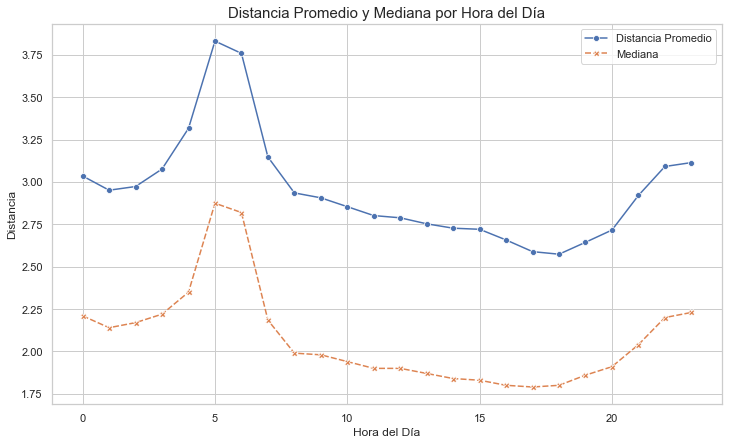

In [153]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Graficar la distancia promedio y mediana por hora del día
plt.figure(figsize=(12, 7))
sns.lineplot(data=hourly_stats, markers=True)
plt.xlabel('Hora del Día')
plt.ylabel('Distancia')
plt.title('Distancia Promedio y Mediana por Hora del Día', size = 15)
plt.legend(['Distancia Promedio', 'Mediana'])
plt.show()

La distancia promedio y la mediana tienden a ser más bajas en las horas de la mañana (por ejemplo, entre las 8:00 y las 10:00) y en las horas de la tarde (por ejemplo, entre las 16:00 y las 18:00). Esto podría deberse a la congestión del tráfico durante las horas pico, lo que reduce la velocidad y la distancia de los viajes.


Las horas con distancias promedio y medianas más altas podrían corresponder a momentos de mayor demanda, como las horas pico de la mañana  y la tarde-noche, cuando las personas se dirigen al trabajo o regresan a sus casas. Podría explicarse  debido a las distancias mas largas entre el hogar y el lugar de trabajo.

A su vez, las horas de la mañana y la noche también podrían estar relacionadas con eventos especiales, como vuelos tempranos o vuelos nocturnos, que podrían requerir viajes más largos hacia o desde los aeropuertos.

● Nos interesa identificar viajes que tengan origen o destino en uno de los aeropuertos del
área de Nueva York. ¿Puedes proporcionar el número de transacciones que cumplen con
este criterio, el costo promedio del viaje y cualquier otra característica interesante de estos
viajes?


In [51]:
data_filtered.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_hour'],
      dtype='object')

In [53]:
ny_zones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


En nuestro set de datos de zonas de NYC encontramos las siguientes zonas cercanas a aeropuertos
- Newark Airport
- JFK Airport
- LaGuardia Airport


In [88]:
# Paso 1: Filtrar los viajes con origen o destino en aeropuertos
airport_location_ids = [1, 132, 138]  # IDs de ubicación de los aeropuertos
airport_trips = data_filtered[data_filtered['PULocationID'].isin(airport_location_ids) | data_filtered['DOLocationID'].isin(airport_location_ids)]

# Crear una lista para almacenar las métricas
metrics_list = []

# Calcular el número total de transacciones
total_num_transactions = len(airport_trips)

# Paso 2 y 3: Calcular métricas para cada aeropuerto y para el conjunto total
for airport_id in airport_location_ids:
    airport_name = ny_zones[ny_zones['LocationID'] == airport_id]['Zone'].values[0]
    
    airport_specific_trips = airport_trips[
        (airport_trips['PULocationID'] == airport_id) | (airport_trips['DOLocationID'] == airport_id)
    ]
    
    num_transactions_origin = len(airport_specific_trips[airport_specific_trips['PULocationID'] == airport_id])
    num_transactions_destination = len(airport_specific_trips[airport_specific_trips['DOLocationID'] == airport_id])
    num_transactions_total = num_transactions_origin + num_transactions_destination
    
    # Métricas para el conjunto total
    total_metrics = {
        'Categoría': airport_name,
        'Variedad': 'Conjunto Total',
        'Número de Transacciones': num_transactions_total,
        'Distancia Promedio': airport_specific_trips['trip_distance'].mean(),
        'Costo Promedio': airport_specific_trips['total_amount'].mean(),
        # Agregar más métricas de conjunto total según sea necesario
    }
    
    # Métricas para origen
    origin_metrics = {
        'Categoría': airport_name,
        'Variedad': 'Origen',
        'Número de Transacciones': num_transactions_origin,
        'Distancia Promedio': airport_specific_trips[airport_specific_trips['PULocationID'] == airport_id]['trip_distance'].mean(),
        'Costo Promedio': airport_specific_trips[airport_specific_trips['PULocationID'] == airport_id]['total_amount'].mean(),
        # Agregar más métricas de origen según sea necesario
    }

    # Métricas para destino
    destination_metrics = {
        'Categoría': airport_name,
        'Variedad': 'Destino',
        'Número de Transacciones': num_transactions_destination,
        'Distancia Promedio': airport_specific_trips[airport_specific_trips['DOLocationID'] == airport_id]['trip_distance'].mean(),
        'Costo Promedio': airport_specific_trips[airport_specific_trips['DOLocationID'] == airport_id]['total_amount'].mean(),
        # Agregar más métricas de destino según sea necesario
    }

    # Agregar métricas a la lista
    metrics_list.append(total_metrics)
    metrics_list.append(origin_metrics)
    metrics_list.append(destination_metrics)

# Calcular métricas para el total de viajes a aeropuertos (origen o destino)
total_airport_metrics = {
    'Categoría': 'Total Aeropuertos',
    'Variedad': 'Conjunto Total',
    'Número de Transacciones': total_num_transactions,
    'Distancia Promedio': airport_trips['trip_distance'].mean(),
    'Costo Promedio': airport_trips['total_amount'].mean(),
    # Agregar más métricas de conjunto total según sea necesario
}

# Agregar métricas a la lista
metrics_list.append(total_airport_metrics)

# Crear un DataFrame a partir de la lista de métricas
metrics_df = pd.DataFrame(metrics_list)

# Imprimir el DataFrame con las métricas
metrics_df


,Categoría,Variedad,Número de Transacciones,Distancia Promedio,Costo Promedio
0,Newark Airport,Conjunto Total,61,11.578909,77.099455
1,Newark Airport,Origen,8,2.483750,50.757500
2,Newark Airport,Destino,53,12.009811,80.008868
3,JFK Airport,Conjunto Total,8489,11.046258,39.706842
4,JFK Airport,Origen,162,5.803519,29.805123
5,JFK Airport,Destino,8327,11.059222,39.837562
6,LaGuardia Airport,Conjunto Total,21155,6.308728,26.181982
7,LaGuardia Airport,Origen,203,5.100197,24.893547
8,LaGuardia Airport,Destino,20952,6.301907,26.180767
9,Total Aeropuertos,Conjunto Total,29507,7.659871,30.136334


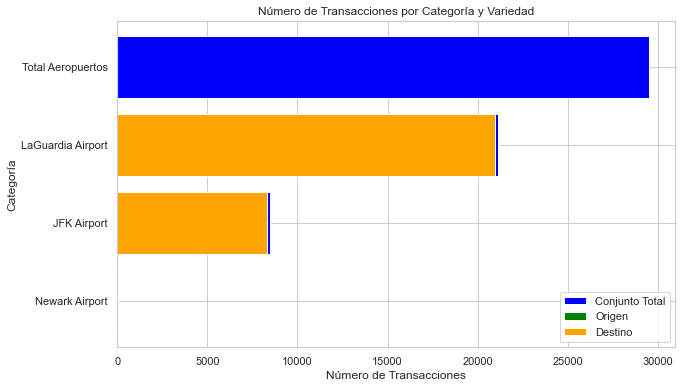

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))

# Colores para las variedades
colors = {'Conjunto Total': 'blue', 'Origen': 'green', 'Destino': 'orange'}

# Iterar a través de las variedades únicas en el DataFrame
for variety in metrics_df['Variedad'].unique():
    subset = metrics_df[metrics_df['Variedad'] == variety]
    plt.barh(subset['Categoría'], subset['Número de Transacciones'], color=colors[variety], label=variety)

plt.title('Número de Transacciones por Categoría y Variedad')
plt.xlabel('Número de Transacciones')
plt.ylabel('Categoría')
# Ubicar la leyenda en el costado izquierdo
plt.legend(loc='lower right')
plt.show()


El aeropuerto que representa la mayor cantidad de transacciones (osea viajes) es "LaGuardia Airport", representando un 71.68% del total de viajes hacia o desde algun aeropuerto de NYC.

Respondiendo a la consigna:

Total de Aeropuertos - Conjunto Total:

    Número de Transacciones: 29,507
    Distancia Promedio: 7.66 millas
    Costo Promedio del Viaje: $30.14

En esta categoría,se consideró la totalidad de los viajes que tienen origen o destino en alguno de los tres aeropuertos del área de Nueva York: Newark Airport, JFK Airport y LaGuardia Airport. En total, se registraron 29,507 transacciones para estos viajes. La distancia promedio recorrida en estos viajes es de aproximadamente 7.66 millas, con un costo promedio del viaje de alrededor de $30.14. Esto nos da una idea general de la tendencia promedio para los viajes que involucran aeropuertos en la zona

El aeropuerto que tiende a tener los viajes más largos en términos de distancia promedio es Newark Airport, con alrededor de 11.58 millas por viaje, mientras que LaGuardia Airport tiene viajes más cortos en promedio, con alrededor de 6.31 millas

En cuanto al costo promedio de los viajes, los viajes que involucran Newark Airport tienden a ser los más costosos, con un promedio de alrededor de $77.10 por viaje.

JFK Airport registra una gran cantidad de transacciones en comparación con los otros dos aeropuertos, tanto para el conjunto total como para los viajes con origen y destino en JFK.

El N° de transacciones en la variedad de "Destino" es mayor que en la variedad de "Origen" para todos los aeropuertos.

Algunos posibles analisis:
- Indagar si hay patrones temporales en los viajes hacia los aeropuertos. ¿Hay horas del día, días de la semana o meses del año en los que los viajes son más frecuentes?
-  Ver si hay zonas específicas de la ciudad que generan más viajes hacia los aeropuertos. ¿Existen ciertos barrios que tienen una mayor proporción de viajes hacia los aeropuertos?

Algo mas avanzado...

Análisis de Regresión: para entender cómo diferentes variables (como la distancia del viaje, el día de la semana, la hora del día) afectan el costo del viaje hacia los aeropuertos. Esto podría ayudarte a identificar qué factores tienen un mayor impacto en el costo y cómo podrían estar relacionados.


Realizar un análisis de regresión implica modelar la relación entre una variable dependiente (en este caso, el costo del viaje) y varias variables independientes (como la distancia del viaje, el día de la semana, la hora del día, entre otras). Aquí están los pasos generales que podrías seguir:

    Preparación de Datos: Organiza tus datos de manera que tengas una matriz donde cada fila representa un viaje y las columnas contienen las variables independientes y la variable dependiente (costo del viaje).

    Exploración de Datos: Realiza un análisis exploratorio de los datos para entender las distribuciones de las variables, detectar valores atípicos y evaluar la relación preliminar entre las variables.

    Selección de Variables: Decide qué variables independientes deseas incluir en el modelo. Puedes usar la intuición, el conocimiento del dominio y análisis de correlación para tomar esta decisión.

    División de Datos: Divide tus datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se usará para construir el modelo y el conjunto de prueba para evaluar su rendimiento.

    Construcción del Modelo: Elige un algoritmo de regresión (por ejemplo, Regresión Lineal, Regresión de Bosques Aleatorios, etc.) y ajusta el modelo a tus datos de entrenamiento.

    Evaluación del Modelo: Utiliza el conjunto de prueba para evaluar el rendimiento del modelo. Puedes medir métricas como el error cuadrado medio (MSE), el coeficiente de determinación (R^2) y otros indicadores de ajuste.

    Interpretación de Resultados: Examina los coeficientes estimados para cada variable independiente en el modelo. Esto te ayudará a entender la dirección y la magnitud de la relación entre las variables y el costo del viaje.

    Validación Cruzada: Si es necesario, realiza validación cruzada para evaluar la estabilidad y la generalización del modelo.

    Ajuste del Modelo: Si el rendimiento del modelo no es satisfactorio, considera realizar ajustes como la transformación de variables, la inclusión de variables adicionales o la exploración de otros algoritmos de regresión.

    Predicciones y Visualización: Utiliza el modelo ajustado para realizar predicciones sobre nuevos datos. También puedes crear gráficos de dispersión y gráficos de residuos para visualizar cómo se ajustan las predicciones a los datos reales.

    Conclusiones: Interpreta los resultados del análisis de regresión y saca conclusiones sobre cómo las variables independientes influyen en el costo del viaje hacia los aeropuertos. Identifica qué factores tienen un mayor impacto en el costo y cómo están relacionados.

Es importante recordar que un análisis de regresión es un proceso iterativo y que la interpretación cuidadosa de los resultados es esencial para tomar decisiones informadas.

##### Q4)
● Crea una variable binaria que indique si el % de la propina sobre el total pagado
(tip_amount / total_amount) es menor al 5%.

In [89]:
# Calcular el porcentaje de la propina sobre el total pagado
data_filtered['tip_percentage'] = (data_filtered['tip_amount'] / data_filtered['total_amount']) * 100

# Crear la variable binaria
data_filtered['tip_below_5_percent'] = data_filtered['tip_percentage'] < 5


● Tenes que ayudar con tips a un taxista que pretende recibir no menos del 5% de propina.
¿Podrías darle algunas recomendaciones?

Analicemos la distribución de propinas por debajo del 5% en diferentes horas del día. ¿Hay ciertas horas en las que tienden a ser más comunes? Esto podría ayudar a los taxistas a planificar sus horarios de trabajo de manera más estratégica.

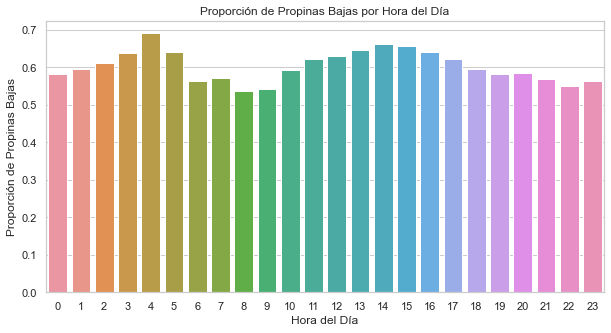

In [113]:
# Análisis por Hora del Día
hourly_analysis = data_filtered.groupby('pickup_hour')['tip_below_5_percent'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_analysis.index, y=hourly_analysis.values)
plt.title('Proporción de Propinas Bajas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Proporción de Propinas Bajas')
plt.show()


El gráfico muestra cómo varía la proporción de propinas por debajo del 5% a lo largo del día. Cada barra en el gráfico representa una hora del día y su altura indica la proporción promedio de propinas por debajo del 5% en esa hora específica.

- Las horas del día con proporciones más bajas de propinas por debajo del 5% son aquellas en la segunda mitad de la tarde hasta la noche, especialmente alrededor de las  16 a 22 PM. Esto sugiere que durante estas horas, es más probable que los pasajeros den propinas que superen el 5% del costo total del viaje. Las primeras horas de la mañana (alrededor de las 3 AM a 6 AM) también tienen proporciones relativamente bajas de propinas por debajo del 5%. Los taxistas podrían enfocarse en trabajar durante estas horas para tener mayores posibilidades de recibir propinas generosas.

- Por otro lado, las horas con proporciones más altas de propinas por debajo del 5% incluyen la madrugada (alrededor de las 12 AM a 2 AM) y las primeras horas de la tarde (alrededor de las 11 AM a 2 PM). Durante estos períodos, es más probable que las propinas sean inferiores al 5% del costo total del viajer, por lo tanto los taxistas podrían planificar sus horas de trabajo en consecuencia.

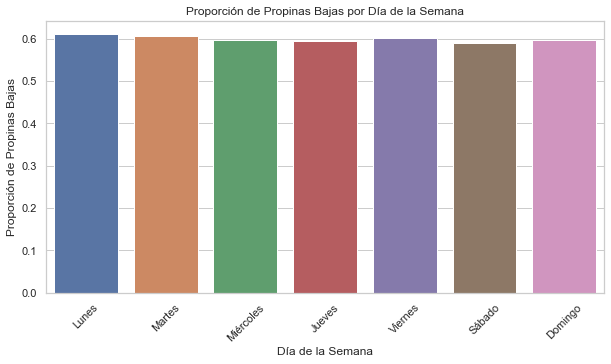

In [122]:
# Análisis por Día de la Semana
weekly_analysis = data_filtered.groupby('day_of_week')['tip_below_5_percent'].mean()
days_of_week = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
plt.figure(figsize=(10, 5))
sns.barplot(x=days_of_week, y=weekly_analysis.values)
plt.title('Proporción de Propinas Bajas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Proporción de Propinas Bajas')
plt.xticks(rotation=45)
plt.show()

Los resultados muestran que las diferencias en las proporciones de propinas por debajo del 5% entre los días de la semana no son muy grandes. Las diferencias son bastante sutiles y todas las proporciones están relativamente cercanas entre sí. Esto sugiere que, en general, el día de la semana podría no tener un impacto significativo en las propinas por debajo del 5%

<Figure size 720x360 with 0 Axes>

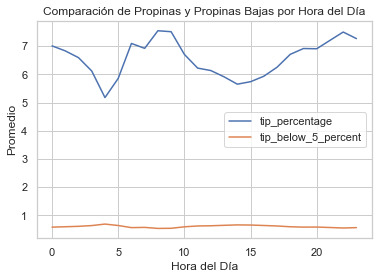

In [131]:
# Análisis Comparativo
hourly_comparison = data_filtered.groupby('pickup_hour')[['tip_percentage', 'tip_below_5_percent']].mean()
plt.figure(figsize=(10, 5))
hourly_comparison[['tip_percentage', 'tip_below_5_percent']].plot()
plt.title('Comparación de Propinas y Propinas Bajas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio')
plt.show()

A las 4:00 de la madrugada, aunque el porcentaje promedio de propinas es más bajo (5.18%), la proporción de propinas por debajo del 5% es relativamente alta (69.03%). Esto también podría indicar que en esas horas, los pasajeros tienden a dar propinas más pequeñas en comparación con el costo total del viaje.

Ahora indagaremos segun la zona de origen (particularmente trabajaremos con la columna "borough")

Para ello, deberemos unir los dos datasets con los que trabajamos. 

Los "boroughs" de Nueva York son las cinco divisiones administrativas principales que componen la ciudad de Nueva York. Cada borough es como un condado individual con su propio gobierno local y características únicas. Los cinco boroughs son:

    Manhattan: Es el borough más famoso y densamente poblado. Es conocido por sus rascacielos icónicos, distritos comerciales, zonas turísticas y su importancia como centro financiero y cultural.

    Brooklyn: Es el borough más grande en términos de población. Es conocido por su diversidad étnica, vibrante escena artística, parques y playas, y una mezcla de vecindarios de diversos estilos.

    Queens: Es el borough más diverso en cuanto a población. Tiene una gran población inmigrante y es conocido por su variedad de restaurantes étnicos, el aeropuerto JFK y el Flushing Meadows-Corona Park.

    Bronx: Es conocido por su rico patrimonio cultural, histórico y deportivo. El Yankee Stadium y el Jardín Zoológico del Bronx se encuentran aquí.

    Staten Island: Es el borough menos poblado y más suburbano. Es conocido por su ambiente más tranquilo, áreas residenciales y acceso al sistema de ferry de Staten Island.


In [143]:
# Realizar la unión entre data_filtered y ny_zones en función de las columnas de ubicación
data_with_zones = data_filtered.merge(ny_zones, left_on='PULocationID', right_on='LocationID', how='left')
data_with_zones = data_with_zones.merge(ny_zones, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pickup', '_dropoff'))

In [137]:
data_with_zones.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_hour', 'tip_percentage', 'tip_below_5_percent', 'day_of_week',
       'LocationID_pickup', 'Borough_pickup', 'Zone_pickup',
       'service_zone_pickup', 'LocationID_dropoff', 'Borough_dropoff',
       'Zone_dropoff', 'service_zone_dropoff'],
      dtype='object')

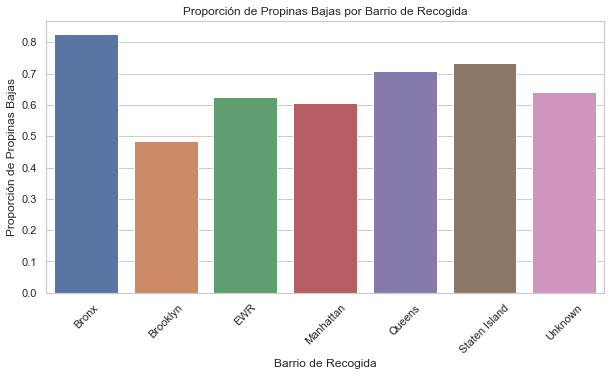

In [144]:
# Análisis por Barrio de Recogida
borough_analysis = data_with_zones.groupby('Borough_pickup')['tip_below_5_percent'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=borough_analysis.index, y=borough_analysis.values)
plt.title('Proporción de Propinas Bajas por Barrio de Recogida')
plt.xlabel('Barrio de Recogida')
plt.ylabel('Proporción de Propinas Bajas')
plt.xticks(rotation=45)
plt.show()


In [158]:
data_with_zones.groupby('Borough_pickup')['tip_below_5_percent'].mean()


Borough_pickup
Bronx            0.826497
Brooklyn         0.483851
EWR              0.625000
Manhattan        0.605673
Queens           0.707681
Staten Island    0.735294
Unknown          0.642416
Name: tip_below_5_percent, dtype: float64

In [162]:
data_with_zones.Borough_pickup.value_counts()

Brooklyn         557343
Manhattan        418708
Queens           403710
Bronx             80229
Unknown            1457
Staten Island        68
EWR                   8
Name: Borough_pickup, dtype: int64

Analizar las propinas segun las zonas de NYC también ayuda a identificar zonas en las que se podría hacer mas hincapié para mejorar el servicio

Bronx: El Bronx tiene la proporción más alta de propinas por debajo del 5%, con aproximadamente el 82.65%. Esto podría indicar que los viajes en esta área tienden a tener propinas más bajas en comparación con otros "boroughs". Se podría sugerir al taxista que preste atención a la calidad del servicio y la satisfacción del cliente para mejorar las posibilidades de recibir propinas más generosas.

Brooklyn: Brooklyn tiene una proporción más baja de propinas por debajo del 5%, alrededor del 48.39%. Esto podría sugerir que los viajes en Brooklyn tienen una tendencia a recibir propinas más aceptables. El taxista podría centrarse en proporcionar un buen servicio y mantener un ambiente amigable para mejorar aún más sus propinas.

Manhattan: Manhattan muestra una proporción de propinas por debajo del 5% de alrededor del 60.57%. Dado que Manhattan es una zona densamente poblada y con un alto tráfico de turistas y locales, es importante brindar un servicio eficiente y cordial para mantener las propinas en un rango aceptable.

Queens: La proporción de propinas por debajo del 5% en Queens es relativamente alta (aproximadamente 70%). Aqui se encuentra el LaGuardia Airport	el cual representó en el data set un total de 20952 viajes. Los taxistas podrían poner principal atención en estos viajes para aumentar la propina. Queens es conocido también por su diversidad étnica y variedad de restaurantes, podría ser beneficioso para el taxista proporcionar recomendaciones de lugares interesantes para comer y brindar un servicio amigable.

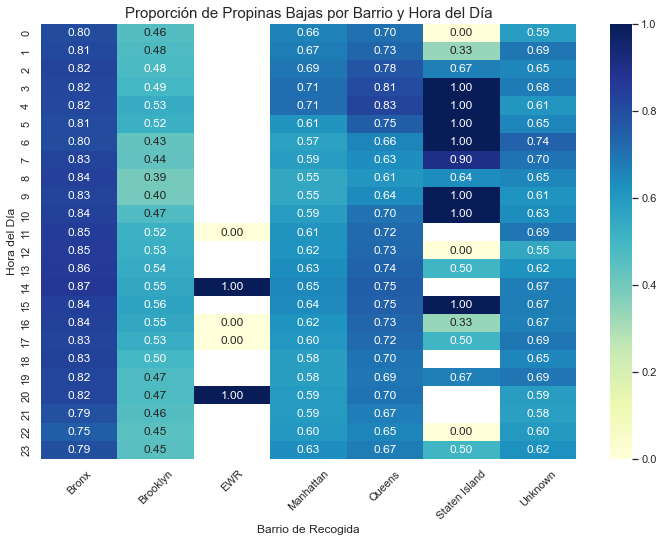

In [164]:
# Crear un pivot table para tener la proporción de propinas bajas por barrio y hora del día
pivot_table = data_with_zones.pivot_table(values='tip_below_5_percent', index='pickup_hour', columns='Borough_pickup')

plt.figure(figsize=(12, 8))
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Proporción de Propinas Bajas por Barrio y Hora del Día', size = 15)
plt.xlabel('Barrio de Recogida')
plt.ylabel('Hora del Día')
plt.xticks(rotation=45)
plt.show()


El heatmap muestra la relación entre las variables "Borough_pickup" y "pickup_hour" con respecto a la proporción de propinas por debajo del 5%. Cada celda en el heatmap representa la proporción promedio de propinas por debajo del 5% para una combinación específica de barrio de recogida y hora del día.

**Horarios y Barrios con Bajas Propinas**: Las celdas con colores más oscuros (valores bajos) indican que en esos barrios y horas del día, la proporción de propinas por debajo del 5% es más alta. Por ejemplo, en la madrugada (entre las 2 AM y las 6 AM), varios barrios como Bronx, Brooklyn y Queens tienen proporciones relativamente más altas de propinas por debajo del 5%.

**Horarios con Altas Propinas:** Las celdas con colores más claros (valores altos) indican que en esos horarios y barrios, la proporción de propinas por debajo del 5% es más baja. Por ejemplo, en la tarde y noche (entre las 16 PM y las 22 PM), varios barrios como Manhattan y Staten Island tienen proporciones más bajas de propinas por debajo del 5%.

**Barrios con Patrones Diferentes:** Al comparar los patrones de diferentes barrios, se puede observar que algunos barrios tienen una proporción constante de propinas bajas a lo largo del día, mientras que otros tienen fluctuaciones más pronunciadas. Por ejemplo, Brooklyn tiende a tener proporciones más altas de propinas bajas durante la mañana y la madrugada, mientras que Manhattan muestra una disminución en estas proporciones durante las horas pico de la tarde y noche.

Analisis de patrones de propinas

Examina cómo varía el porcentaje de propina en función de la distancia del viaje, el costo total del viaje y otros factores relevantes. Identifica si existe una tendencia clara de que viajes más largos o más costosos están asociados con propinas más altas.

In [91]:
correlation = data_filtered['trip_distance'].corr(data_filtered['tip_amount'])
print("Coeficiente de correlación:", correlation)


Coeficiente de correlación: 0.4068676210332409


El coeficiente de correlación entre la distancia del viaje y la propina es aproximadamente 0.407. Esto indica una correlación positiva moderada entre estas dos variables. Esto significa que, en general, a medida que la distancia del viaje aumenta, es más probable que la propina también aumente.

In [94]:
# Calcular la correlación entre las variables
correlation_distance = data_filtered['tip_percentage'].corr(data_filtered['trip_distance'])
correlation_total_cost = data_filtered['tip_percentage'].corr(data_filtered['total_amount'])

print("Coeficiente de correlación entre porcentaje de propina y distancia:", correlation_distance)
print("Coeficiente de correlación entre porcentaje de propina y costo total:", correlation_total_cost)

Coeficiente de correlación entre porcentaje de propina y distancia: 0.11033170703152122
Coeficiente de correlación entre porcentaje de propina y costo total: 0.26246280857500676


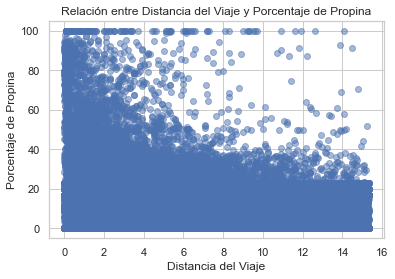

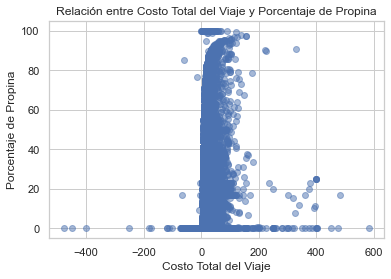

In [95]:
# Crear gráficos de dispersión
plt.scatter(data_filtered['trip_distance'], data_filtered['tip_percentage'], alpha=0.5)
plt.xlabel('Distancia del Viaje')
plt.ylabel('Porcentaje de Propina')
plt.title('Relación entre Distancia del Viaje y Porcentaje de Propina')
plt.show()

plt.scatter(data_filtered['total_amount'], data_filtered['tip_percentage'], alpha=0.5)
plt.xlabel('Costo Total del Viaje')
plt.ylabel('Porcentaje de Propina')
plt.title('Relación entre Costo Total del Viaje y Porcentaje de Propina')
plt.show()

Si el coeficiente de correlación entre la distancia del viaje y el total de propinas es aproximadamente 0.407, y el coeficiente de correlación entre la distancia del viaje y el porcentaje de propina es aproximadamente 0.110, ambos indican una correlación positiva moderada en términos de que a medida que la distancia del viaje aumenta, las propinas (tanto en total como en porcentaje) tienden a aumentar en promedio. **Se podría decirle al taxista que podría esperar propinas ligeramente mayores en viajes más largos**

El coeficiente de correlación entre el porcentaje de propina y la distancia del viaje es aproximadamente 0.11, lo que sugiere una correlación débil entre estas dos variables. Esto podría indicar que, en promedio, la distancia del viaje no tiene un impacto significativo en el porcentaje de propina recibida.

Por otro lado, el coeficiente de correlación entre el porcentaje de propina y el costo total del viaje es alrededor de 0.26, lo que también indica una correlación débil. Esto podría interpretarse como que, en general, no existe una relación sólida entre el costo total del viaje y el porcentaje de propina.

Dado que los coeficientes de correlación son bajos, es importante tener en cuenta que otros factores podrían estar influyendo en las propinas, y estos resultados sugieren que no existe una relación lineal fuerte entre la distancia o el costo y el porcentaje de propina.

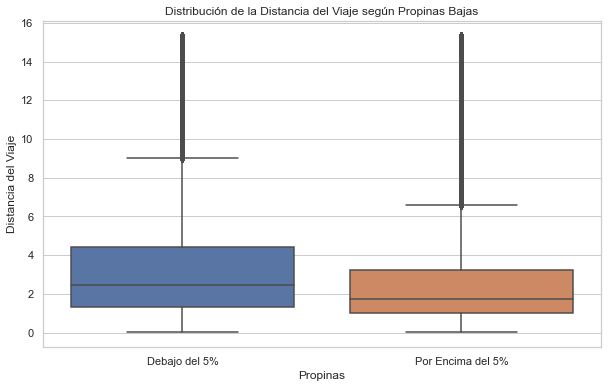

In [147]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=data_filtered['tip_below_5_percent'], y=data_filtered['trip_distance'])
plt.title('Distribución de la Distancia del Viaje según Propinas Bajas')
plt.xlabel('Propinas')
plt.ylabel('Distancia del Viaje')

plt.xticks([0, 1], ['Debajo del 5%', 'Por Encima del 5%'])
plt.show()